In [134]:
import pandas as pd

df = pd.read_csv('/content/openalex.csv')
df.head(5)


,id,doi,title,display_name,relevance_score,publication_year,publication_date,language,type,type_crossref,...,locations.source.host_organization_lineage_names,locations.source.type,sustainable_development_goals.id,sustainable_development_goals.score,sustainable_development_goals.display_name,grants.funder,grants.funder_display_name,grants.award_id,counts_by_year.year,counts_by_year.cited_by_count
0,https://openalex.org/W2586112617,https://doi.org/10.1109/pdp2018.2018.00060,Predicting the Price of Bitcoin Using Machine ...,Predicting the Price of Bitcoin Using Machine ...,595.52850,2018,2018-03-01,en,article,proceedings-article,...,nan|National College of Ireland|National Colle...,nan|repository|repository,https://metadata.un.org/sdg/9,0.45,"Industry, innovation and infrastructure",NaN,NaN,NaN,2025|2024|2023|2022|2021|2020|2019|2018|2017,22|68|96|110|89|100|62|18|1
1,https://openalex.org/W2774345737,https://doi.org/10.1108/jrf-06-2017-0092,Using sentiment analysis to predict interday B...,Using sentiment analysis to predict interday B...,316.80713,2017,2017-11-30,en,article,journal-article,...,Emerald Publishing Limited,journal,https://metadata.un.org/sdg/8,0.58,Decent work and economic growth,NaN,NaN,NaN,2025|2024|2023|2022|2021|2020|2019|2018,11|21|37|32|26|22|16|4
2,https://openalex.org/W2902408730,https://doi.org/10.1016/j.asoc.2018.11.038,"Predicting the direction, maximum, minimum and...","Predicting the direction, maximum, minimum and...",273.68604,2018,2018-12-01,en,article,journal-article,...,Elsevier BV,journal,https://metadata.un.org/sdg/17,0.54,Partnerships for the goals,NaN,NaN,NaN,2025|2024|2023|2022|2021|2020|2019,11|31|45|47|48|34|4
3,https://openalex.org/W2923169900,https://doi.org/10.1016/j.najef.2019.03.019,Can uncertainty indices predict Bitcoin prices...,Can uncertainty indices predict Bitcoin prices...,213.77898,2019,2019-03-27,en,article,journal-article,...,Elsevier BV,journal,NaN,NaN,NaN,NaN,NaN,NaN,2025|2024|2023|2022|2021|2020|2019,9|24|19|18|27|19|3
4,https://openalex.org/W2727968912,NaN,Predicting Bitcoin price fluctuation with Twit...,Predicting Bitcoin price fluctuation with Twit...,194.40848,2017,2017-01-01,en,article,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024|2023|2022|2021|2020|2019|2018,3|3|5|10|14|16|1


In [135]:
df['abstract']


,abstract
0,The goal of this paper is to ascertain with wh...
1,Abstract Purpose The purpose of this study is ...
2,NaN
3,NaN
4,NaN
...,...
117,Financial markets are increasingly interlinked...
118,NaN
119,NaN
120,Market traders often buy and sell volatile ass...


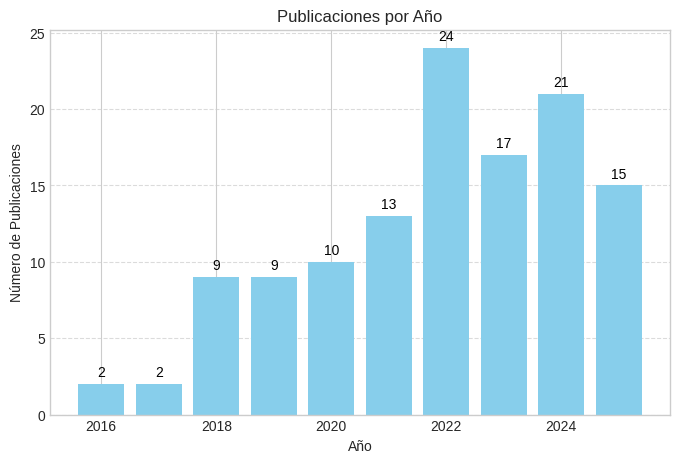

In [136]:
# ===========================================
# 📊 Gráfica de publicaciones por año (OpenAlex)
# ===========================================

# 1. Importar librerías
import matplotlib.pyplot as plt

# 3. Contar el número de publicaciones por año
publicaciones_por_año = df['publication_year'].value_counts().sort_index()

# 4. Crear la gráfica
plt.figure(figsize=(8,5))
bars = plt.bar(publicaciones_por_año.index, publicaciones_por_año.values, color='skyblue')
plt.title('Publicaciones por Año')
plt.xlabel('Año')
plt.ylabel('Número de Publicaciones')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ✅ Agregar los números encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # posición x centrada
        height + 0.3,                     # posición y un poco arriba de la barra
        f'{int(height)}',                 # texto (número entero)
        ha='center', va='bottom', fontsize=10, color='black'
    )

# 5. Mostrar la gráfica
plt.show()


In [137]:
# 3. Filtrar solo años mayores e iguales al 2022
df_filtrado = df[df['publication_year'] >= 2022]

# 4. Contar las publicaciones por año
publicaciones_por_año = df_filtrado['publication_year'].value_counts().sort_index()

# 5. Mostrar el resultado
print("📅 Publicaciones por año (mayores e iguales a 2022):\n")
print(publicaciones_por_año)

total_mayores_2022 = df_filtrado.shape[0]

# 5. Mostrar el resultado
print(f"📚 Total de publicaciones con año mayor igual a 2022: {total_mayores_2022}")


📅 Publicaciones por año (mayores e iguales a 2022):

publication_year
2022    24
2023    17
2024    21
2025    15
Name: count, dtype: int64
📚 Total de publicaciones con año mayor igual a 2022: 77


In [138]:
df_filtrado.shape[0]

77

In [185]:
import re

tecnicas = [
    # 📈 Modelos estadísticos / econométricos
    'ARIMA', 'SARIMA', 'GARCH', 'EGARCH', 'ARCH', 'VAR', 'VECM', 'Regression',
    'Linear Regression', 'Logistic Regression', 'Bayesian Regression', 'Kalman Filter',
    'Markov Model', 'Hidden Markov Model', 'Cointegration', 'Time Series Forecasting',

    # 🤖 Machine Learning (ML)
    'SVM', 'Support Vector Machine', 'Random Forest', 'Decision Tree', 'XGBoost', 'LightGBM',
    'CatBoost', 'AdaBoost', 'KNN', 'Naive Bayes', 'Gradient Boosting', 'Ensemble',
    'MLP', 'Multilayer Perceptron', 'Machine Learning', 'ML', 'Feature Selection',
    'Hyperparameter Tuning',

    # 🧬 Deep Learning (DL)
    'LSTM', 'RNN', 'GRU', 'CNN', 'DNN', 'Autoencoder', 'Deep Learning', 'Neural Network',
    'ANN', 'BiLSTM', 'BiGRU', 'Attention Mechanism', 'Transformer', 'GAN', 'VAE',
    'Seq2Seq', 'Encoder Decoder',

    # 💬 NLP y modelos de lenguaje
    'BERT', 'FinBERT', 'RoBERTa', 'DistilBERT', 'GPT', 'XLNet', 'T5', 'Word2Vec',
    'Doc2Vec', 'Text Mining', 'NLP', 'Natural Language Processing', 'Sentiment Analysis',
    'Topic Modeling', 'TF-IDF', 'Embedding', 'Word Embedding',

    # 🧩 Modelos híbridos / meta-modelos
    'Hybrid Model', 'Fusion Model', 'Combined Model', 'Multimodal', 'Metaheuristic',
    'Optimization', 'Genetic Algorithm', 'PSO', 'Particle Swarm Optimization',
    'GA', 'Firefly Algorithm', 'Simulated Annealing', 'Deep Reinforcement Learning',
    'Reinforcement Learning', 'Q-Learning', 'DQN', 'Policy Gradient',

    # 💡 Otros enfoques relevantes
    'Clustering', 'K-Means', 'PCA', 'Feature Engineering', 'Data Mining',
    'Forecasting Model', 'Anomaly Detection', 'Time Series Analysis'
]

def detectar_tecnicas(texto):
    if pd.isna(texto): return None
    encontrados = [t for t in tecnicas if re.search(rf'\b{t}\b', texto, re.IGNORECASE)]
    return ', '.join(encontrados) if encontrados else None

#df_filtrado = df[df['publication_year'] >= 2022].copy()

#df_filtrado['Tecnicas_detectadas'] = df_filtrado['title'].apply(detectar_tecnicas)
# Buscar técnicas tanto en el título como en el resumen
df_filtrado['Tecnicas_detectadas'] = df_filtrado.apply(
    lambda row: detectar_tecnicas(f"{row.get('title', '')} {row.get('abstract', '')}"),
    axis=1
)

conteo = df_filtrado['Tecnicas_detectadas'].value_counts()
print(conteo.head(25))

# 5️⃣ Exportar archivo CSV con los resultados
output_path = "articles_with_detected_techniques.csv"
df_filtrado[['publication_year', 'title', 'Tecnicas_detectadas']].to_csv(output_path, index=False)
articulos_sin_tecnica = df_filtrado[df_filtrado['Tecnicas_detectadas'].isna()]


print(f"\n✅ Archivo exportado exitosamente: {output_path}")
print(f"Total de artículos con técnicas detectadas: {df_filtrado['Tecnicas_detectadas'].notna().sum()}")

# Filtrar los que NO tienen técnicas detectadas
articulos_sin_tecnica = df_filtrado[df_filtrado['Tecnicas_detectadas'].isna()]

# Mostrar resumen
print(f"🧐 Total de artículos SIN técnicas detectadas: {articulos_sin_tecnica.shape[0]}")

# Exportar a CSV
articulos_sin_tecnica.to_csv("articulos_sin_tecnica_detectada.csv", index=False)

print("✅ Archivo exportado: articulos_sin_tecnica_detectada.csv")



Tecnicas_detectadas
Machine Learning                                                                                                            11
Deep Learning                                                                                                                7
Neural Network                                                                                                               3
Sentiment Analysis                                                                                                           3
ARIMA                                                                                                                        3
Regression                                                                                                                   2
Regression, Linear Regression, Random Forest                                                                                 2
Regression, Logistic Regression, Support Vector Machine, Random Forest, Machine Learning   

/tmp/ipython-input-565529322.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Tecnicas_detectadas'] = df_filtrado.apply(


In [188]:
import pandas as pd
import re

# Cargar el archivo
df_no_tech = pd.read_csv("articulos_sin_tecnica_detectada.csv")

# Definir patrones genéricos que podrían indicar tipo de técnica
categorias_generales = {
    'Machine Learning / AI': [
        'artificial intelligence', 'ai', 'machine learning', 'learning model',
        'data-driven', 'supervised', 'unsupervised', 'training', 'classification', 'regression model'
    ],
    'Statistical / Forecasting': [
        'forecasting', 'prediction', 'statistical', 'econometric', 'trend analysis',
        'time series', 'correlation', 'modeling', 'data analysis'
    ],
    'Sentiment / NLP': [
        'sentiment', 'text', 'emotion', 'opinion', 'social media', 'nlp',
        'bert', 'language model', 'semantic', 'vader', 'finbert'
    ],
    'Hybrid / Metaheuristic': [
        'hybrid', 'optimization', 'metaheuristic', 'genetic', 'swarm', 'reinforcement'
    ]
}

# Función para clasificar
def clasificar_generico(text):
    if pd.isna(text):
        return None
    text_lower = text.lower()
    for categoria, palabras in categorias_generales.items():
        if any(re.search(rf'\b{p}\b', text_lower) for p in palabras):
            return categoria
    return 'Other / Unspecified'

# Aplicar sobre título + resumen (si existe)
df_no_tech['Categoria_Reclasificada'] = df_no_tech.apply(
    lambda row: clasificar_generico(f"{row.get('title', '')} {row.get('abstract', '')}"),
    axis=1
)

# Contar resultados
print("📊 Clasificación de artículos sin técnica detectada:")
print(df_no_tech['Categoria_Reclasificada'].value_counts())

# Guardar nuevo archivo
df_no_tech.to_csv("articulos_reclasificados.csv", index=False)
print("\n✅ Archivo guardado: articulos_reclasificados.csv")


📊 Clasificación de artículos sin técnica detectada:
Categoria_Reclasificada
Other / Unspecified          13
Statistical / Forecasting     3
Machine Learning / AI         2
Sentiment / NLP               1
Name: count, dtype: int64

✅ Archivo guardado: articulos_reclasificados.csv


In [175]:
conteo.shape[0]

22

In [140]:
#INICIO ESTADO DEL ARTE
# Mostrar títulos y año de publicación
df_titles = df_filtrado[['publication_year', 'title', 'abstract']].dropna().sort_values('publication_year')
df_titles.head(20)

,publication_year,title,abstract
16,2022,Predicting Bitcoin (BTC) Price in the Context ...,Bitcoin (BTC)-the first cryptocurrency-is a de...
21,2022,PREDICTING THE PRICE OF BITCOIN USING MACHINE ...,The goal of this paper is to ascertain with wh...
27,2022,Using ARIMA model to analyse and predict bitco...,"In this paper, Autoregressive Integrated Movin..."
58,2022,Predicting Bitcoin Prices via Machine Learning...,"Abstract In this study, we predict Bitcoin pri..."
60,2022,Application Deep Learning to Predict Crypto Cu...,"redicting currency rates is important, for eve..."
120,2022,Predict the Future Price Movements of Gold and...,Market traders often buy and sell volatile ass...
83,2022,Bitcoin Price Predictive Modeling Using Expert...,The paper studies the linear model for Bitcoin...
77,2022,Time Series Predictive Analysis of Bitcoin Price,"As a great innovation in virtual currency, bit..."
69,2023,APPLICATION OF HYBRID LSTAR-GARCH MODEL WITH E...,Time series data from bitcoin has nonlinear da...
40,2023,"Predicting the Price of Bitcoin, Dogecoin and ...","Contemporarily, blockchains and cryptocurrenci..."


In [141]:
import re

# Lista de técnicas a buscar
techniques = [
    # 📈 Modelos estadísticos / econométricos
    'ARIMA', 'SARIMA', 'GARCH', 'EGARCH', 'ARCH', 'VAR', 'VECM', 'Regression',
    'Linear Regression', 'Logistic Regression', 'Bayesian Regression', 'Kalman Filter',
    'Markov Model', 'Hidden Markov Model', 'Cointegration', 'Time Series Forecasting',

    # 🤖 Machine Learning (ML)
    'SVM', 'Support Vector Machine', 'Random Forest', 'Decision Tree', 'XGBoost', 'LightGBM',
    'CatBoost', 'AdaBoost', 'KNN', 'Naive Bayes', 'Gradient Boosting', 'Ensemble',
    'MLP', 'Multilayer Perceptron', 'Machine Learning', 'ML', 'Feature Selection',
    'Hyperparameter Tuning',

    # 🧬 Deep Learning (DL)
    'LSTM', 'RNN', 'GRU', 'CNN', 'DNN', 'Autoencoder', 'Deep Learning', 'Neural Network',
    'ANN', 'BiLSTM', 'BiGRU', 'Attention Mechanism', 'Transformer', 'GAN', 'VAE',
    'Seq2Seq', 'Encoder Decoder',

    # 💬 NLP y modelos de lenguaje
    'BERT', 'FinBERT', 'RoBERTa', 'DistilBERT', 'GPT', 'XLNet', 'T5', 'Word2Vec',
    'Doc2Vec', 'Text Mining', 'NLP', 'Natural Language Processing', 'Sentiment Analysis',
    'Topic Modeling', 'TF-IDF', 'Embedding', 'Word Embedding',

    # 🧩 Modelos híbridos / meta-modelos
    'Hybrid Model', 'Fusion Model', 'Combined Model', 'Multimodal', 'Metaheuristic',
    'Optimization', 'Genetic Algorithm', 'PSO', 'Particle Swarm Optimization',
    'GA', 'Firefly Algorithm', 'Simulated Annealing', 'Deep Reinforcement Learning',
    'Reinforcement Learning', 'Q-Learning', 'DQN', 'Policy Gradient',

    # 💡 Otros enfoques relevantes
    'Clustering', 'K-Means', 'PCA', 'Feature Engineering', 'Data Mining',
    'Forecasting Model', 'Anomaly Detection', 'Time Series Analysis'
]

# Función para detectar técnicas
def detect_techniques(text):
    if pd.isna(text):
        return None
    found = [t for t in techniques if re.search(rf'\b{t}\b', text, re.IGNORECASE)]
    return ', '.join(found) if found else None

# Aplicar sobre título + resumen (si existe)

df_filtrado['Detected_Techniques'] = df_filtrado.apply(
    lambda row: detect_techniques(f"{row.get('title','')} {row.get('abstract','')}"), axis=1
)

# Ver los artículos que tienen técnicas detectadas
df_tech = df_filtrado[df_filtrado['Detected_Techniques'].notna()]
df_tech[['publication_year', 'title', 'abstract','Detected_Techniques']].head(15)
df_tech.head(15)



/tmp/ipython-input-1374026991.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Detected_Techniques'] = df_filtrado.apply(


,id,doi,title,display_name,relevance_score,publication_year,publication_date,language,type,type_crossref,...,sustainable_development_goals.id,sustainable_development_goals.score,sustainable_development_goals.display_name,grants.funder,grants.funder_display_name,grants.award_id,counts_by_year.year,counts_by_year.cited_by_count,Tecnicas_detectadas,Detected_Techniques
11,https://openalex.org/W4376115431,https://doi.org/10.3390/e25050777,Predicting Bitcoin Prices Using Machine Learning,Predicting Bitcoin Prices Using Machine Learning,140.025500,2023,2023-05-10,en,article,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,2025|2024|2023,9|13|2,Machine Learning,"Regression, Logistic Regression, Support Vecto..."
16,https://openalex.org/W4306741992,https://doi.org/10.3390/e24101487,Predicting Bitcoin (BTC) Price in the Context ...,Predicting Bitcoin (BTC) Price in the Context ...,120.714966,2022,2022-10-18,en,article,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,2025|2024|2023|2022,4|14|8|1,Machine Learning,"Regression, Ensemble, MLP, Multilayer Perceptr..."
19,https://openalex.org/W4293723946,https://doi.org/10.1016/j.jbef.2022.100741,A new hybrid machine learning model for predic...,A new hybrid machine learning model for predic...,108.736300,2022,2022-08-30,en,article,journal-article,...,https://metadata.un.org/sdg/9,0.51,"Industry, innovation and infrastructure",NaN,NaN,NaN,2025|2024|2023|2022,4|9|6|2,Machine Learning,Machine Learning
20,https://openalex.org/W4385462379,https://doi.org/10.3390/bdcc7030137,Predicting the Price of Bitcoin Using Sentimen...,Predicting the Price of Bitcoin Using Sentimen...,105.391050,2023,2023-07-31,en,article,journal-article,...,NaN,NaN,NaN,https://openalex.org/F4320321181,Austrian Science Fund,DFH-23,2025|2024|2023,6|6|5,Time Series Forecasting,"Regression, Linear Regression, Time Series For..."
21,https://openalex.org/W4308441283,https://doi.org/10.56726/irjmets30998,PREDICTING THE PRICE OF BITCOIN USING MACHINE ...,PREDICTING THE PRICE OF BITCOIN USING MACHINE ...,101.247870,2022,2022-11-07,en,article,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,2024|2023|2022|2021|2020|2018,1|2|1|2|1|4,Machine Learning,"ARIMA, Time Series Forecasting, Machine Learni..."
23,https://openalex.org/W4221006294,https://doi.org/10.1109/iccci54379.2022.9740772,Predicting Bitcoin Price using Machine Learning,Predicting Bitcoin Price using Machine Learning,97.686090,2022,2022-01-25,en,article,proceedings-article,...,NaN,NaN,NaN,NaN,NaN,NaN,2025|2024|2023|2020,3|3|3|1,Machine Learning,Machine Learning
24,https://openalex.org/W4313509021,https://doi.org/10.1016/j.ribaf.2022.101836,How well do investor sentiment and ensemble le...,How well do investor sentiment and ensemble le...,97.467545,2022,2022-12-05,en,article,journal-article,...,NaN,NaN,NaN,https://openalex.org/F4320321006,Grantová Agentura České Republiky,22-22586S,2025|2024|2023,2|9|5,Ensemble,Ensemble
27,https://openalex.org/W4311786172,https://doi.org/10.54691/bcpbm.v34i.3161,Using ARIMA model to analyse and predict bitco...,Using ARIMA model to analyse and predict bitco...,76.982940,2022,2022-12-14,en,article,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,2025|2024|2023,1|4|1,ARIMA,ARIMA
31,https://openalex.org/W4382052441,https://doi.org/10.1109/vitecon58111.2023.1015...,A Deep Learning based Model for Predicting the...,A Deep Learning based Model for Predicting the...,69.581550,2023,2023-05-05,en,article,proceedings-article,...,NaN,NaN,NaN,NaN,NaN,NaN,2025|2024|2023,3|1|1,Deep Learning,Deep Learning
32,https://openalex.org/W4391031642,https://doi.org/10.30574/wjarr.2024.21.1.0074,Analyzing the machine Learning methods to pred...,Analyzing the machine Learning methods to pred...,68.540780,2024,2024-01-19,en,article,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,2025|2024,3|1,Machine Learning,"Regression, Linear Regression, Logistic Regres..."


In [172]:
df_tech.shape[0]

58

Top 10 técnicas más mencionadas:
Detected_Techniques
Machine Learning      21
Neural Network        14
Deep Learning         12
LSTM                  10
Regression             9
ARIMA                  7
Sentiment Analysis     6
Random Forest          5
GARCH                  5
Linear Regression      4
Name: count, dtype: int64


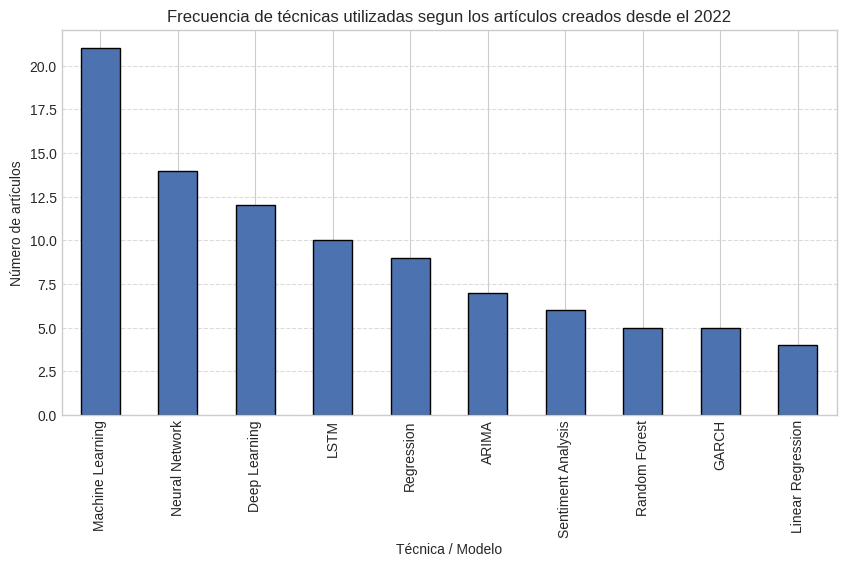

In [142]:
# Contar frecuencia de técnicas

tech_counts = df_tech['Detected_Techniques'].str.split(', ').explode().value_counts()

# Mostrar top 10
print("Top 10 técnicas más mencionadas:")
print(tech_counts.head(10))

# Visualizar
tech_counts.head(10).plot(kind='bar', figsize=(10,5), color='#4C72B0', edgecolor='black')
plt.title("Frecuencia de técnicas utilizadas segun los artículos creados desde el 2022")
plt.xlabel("Técnica / Modelo")
plt.ylabel("Número de artículos")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [143]:
# Ver principales revistas o fuentes
# Si la columna existe:
if 'locations.source.display_name' in df.columns:
    journals = df['locations.source.display_name'].value_counts().head(10)
    print("Revistas / fuentes principales:\n")
    print(journals)


Revistas / fuentes principales:

locations.source.display_name
SSRN Electronic Journal                                                            4
Lecture notes in computer science                                                  2
Computational Economics                                                            2
RePEc: Research Papers in Economics                                                2
International Journal of Electronic Finance|RePEc: Research Papers in Economics    2
Lecture notes in networks and systems                                              2
arXiv (Cornell University)|DataCite API                                            2
CRC Press eBooks                                                                   2
BCP Business & Management                                                          2
arXiv (Cornell University)|arXiv (Cornell University)|DataCite API                 2
Name: count, dtype: int64


In [144]:
# Guardar la tabla con técnicas detectadas
df_tech.to_csv("bitcoin_prediction_articles_with_techniques.csv", index=False)
print("✅ Archivo guardado: bitcoin_prediction_articles_with_techniques.csv")


✅ Archivo guardado: bitcoin_prediction_articles_with_techniques.csv


In [145]:
# ===========================================
# 📊 Detección de artículos con análisis de sentimiento
# ===========================================

# Palabras clave relacionadas con sentimiento y redes sociales
sentiment_keywords = [
    # 🐦 Redes sociales y fuentes textuales
    'twitter', 'tweet', 'tweets', 'reddit', 'facebook', 'social media',
    'telegram', 'youtube', 'google trends', 'news headlines', 'news sentiment',
    'media sentiment', 'investor sentiment', 'market sentiment', 'online sentiment',

    # 💬 Sentimiento, emociones y polaridad
    'sentiment', 'emotion', 'emotions', 'emotional tone', 'opinion',
    'polarity', 'subjectivity', 'mood', 'happiness index', 'fear index',
    'fear and greed', 'psychology', 'investor mood', 'public opinion',
    'sentiment polarity', 'text polarity', 'emotional analysis',

    # 🔤 Procesamiento del lenguaje natural
    'nlp', 'natural language', 'text mining', 'text analysis', 'topic modeling',
    'language model', 'semantic analysis', 'word embedding', 'doc2vec',
    'word2vec', 'tf-idf', 'bag of words', 'transformer', 'bert', 'finbert',
    'roberta', 'gpt', 'xlm', 'distilbert', 't5', 'llm', 'large language model',

    # 📊 Indicadores o métricas de sentimiento
    'vader', 'textblob', 'finbert score', 'sentiment index', 'sentiment score',
    'sentiment classification', 'bullish', 'bearish', 'positive sentiment',
    'negative sentiment', 'neutral sentiment', 'opinion mining',

    # 🧩 Combinaciones o métodos híbridos
    'multimodal sentiment', 'hybrid sentiment', 'social media analysis',
    'news analytics', 'textual data', 'textual analysis', 'semantic model',
    'fintext', 'finbert', 'contextual embedding'
]


# Función para detectar menciones
def detect_sentiment_terms(text):
    if pd.isna(text):
        return None
    found = [word for word in sentiment_keywords if re.search(rf'\b{word}\b', text, re.IGNORECASE)]
    return ', '.join(found) if found else None

# Aplicar sobre título + resumen (si existe)
df_filtrado['Sentiment_Keywords'] = df_filtrado.apply(
    lambda row: detect_sentiment_terms(f"{row.get('title', '')} {row.get('abstract', '')}"),
    axis=1
)

# Filtrar artículos que mencionan sentimiento o redes sociales
df_sentiment = df_filtrado[df_filtrado['Sentiment_Keywords'].notna()]

# ✅ Filtrar solo los artículos desde 2022 en adelante
df_sentiment = df_sentiment[df_sentiment['publication_year'] >= 2022]

# ✅ Ordenar del más reciente al más antiguo
df_sentiment = df_sentiment.sort_values(by='publication_year', ascending=False)

# Mostrar resultados
print("📚 Artículos que mencionan sentimiento, redes sociales o NLP:")
df_sentiment[['publication_year', 'title', 'Sentiment_Keywords']].head(20)


📚 Artículos que mencionan sentimiento, redes sociales o NLP:


/tmp/ipython-input-2787322010.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Sentiment_Keywords'] = df_filtrado.apply(


,publication_year,title,Sentiment_Keywords
76,2025,Time-Series Transformer for Predicting Bitcoin...,transformer
110,2025,Convergence of Twitter Sentiment Analysis and ...,"twitter, tweets, sentiment, vader"
74,2024,Mining Tweets to Predict Future Bitcoin Price,"twitter, tweet, tweets, social media"
94,2024,Predicting Bitcoin price movement through Sent...,sentiment
118,2024,Using Historical Values and Social Media Senti...,social media
43,2024,Machine Learning-Based Approach for Predicting...,twitter
119,2024,Exploring the Effectiveness of Adding Sentimen...,sentiment
20,2023,Predicting the Price of Bitcoin Using Sentimen...,"tweet, sentiment, bert"
34,2023,Predicting bitcoin price fluctuation by Twitte...,"twitter, sentiment"
24,2022,How well do investor sentiment and ensemble le...,"investor sentiment, sentiment"


In [146]:
total_articles = df_filtrado.shape[0]
sentiment_articles = df_sentiment.shape[0]
print(f"De {total_articles} artículos totales, {sentiment_articles} ({sentiment_articles/total_articles:.1%}) mencionan análisis de sentimiento o redes sociales.")


De 77 artículos totales, 15 (19.5%) mencionan análisis de sentimiento o redes sociales.


In [147]:
# ===========================================
# 📊 Comparación de artículos: con y sin análisis de sentimiento
# ===========================================

# ✅ Artículos con sentimiento (ya definidos)
df_sentiment = df_filtrado[df_filtrado['Sentiment_Keywords'].notna()]

# ✅ Artículos SIN sentimiento
df_no_sentiment = df_filtrado[df_filtrado['Sentiment_Keywords'].isna()]

# ✅ Calcular totales y proporciones
total_articles = df_filtrado.shape[0]
sentiment_count = df_sentiment.shape[0]
no_sentiment_count = df_no_sentiment.shape[0]

# Calcular proporciones
sentiment_ratio = sentiment_count / total_articles * 100
no_sentiment_ratio = no_sentiment_count / total_articles * 100

# Mostrar resultados
print(f"📊 Total de artículos (desde 2022): {total_articles}")
print(f"🧠 Con análisis de sentimiento: {sentiment_count} ({sentiment_ratio:.1f}%)")
print(f"📄 Sin análisis de sentimiento: {no_sentiment_count} ({no_sentiment_ratio:.1f}%)")


📊 Total de artículos (desde 2022): 77
🧠 Con análisis de sentimiento: 15 (19.5%)
📄 Sin análisis de sentimiento: 62 (80.5%)


In [148]:
df_sentiment_with_tech = df_sentiment[df_sentiment['Detected_Techniques'].notna()]
df_sentiment_with_tech[['publication_year', 'title', 'Detected_Techniques', 'Sentiment_Keywords']].head(15)


,publication_year,title,Detected_Techniques,Sentiment_Keywords
20,2023,Predicting the Price of Bitcoin Using Sentimen...,"Regression, Linear Regression, Time Series For...","tweet, sentiment, bert"
24,2022,How well do investor sentiment and ensemble le...,Ensemble,"investor sentiment, sentiment"
34,2023,Predicting bitcoin price fluctuation by Twitte...,Sentiment Analysis,"twitter, sentiment"
39,2022,Predicting the Price Direction of Bitcoin Usin...,Machine Learning,twitter
43,2024,Machine Learning-Based Approach for Predicting...,Machine Learning,twitter
76,2025,Time-Series Transformer for Predicting Bitcoin...,Transformer,transformer
83,2022,Bitcoin Price Predictive Modeling Using Expert...,Regression,opinion
84,2022,Predicting Bitcoin Prices Using Sentiment Anal...,Sentiment Analysis,sentiment
94,2024,Predicting Bitcoin price movement through Sent...,Sentiment Analysis,sentiment
100,2022,The Application of Natural Language Processing...,Natural Language Processing,natural language


In [155]:
df_no_sentiment[['publication_year', 'title', 'Detected_Techniques', 'Sentiment_Keywords']].head(15)


,publication_year,title,Detected_Techniques,Sentiment_Keywords
11,2023,Predicting Bitcoin Prices Using Machine Learning,"Regression, Logistic Regression, Support Vecto...",None
16,2022,Predicting Bitcoin (BTC) Price in the Context ...,"Regression, Ensemble, MLP, Multilayer Perceptr...",None
18,2023,The predictive power of Bitcoin prices for the...,None,None
19,2022,A new hybrid machine learning model for predic...,Machine Learning,None
21,2022,PREDICTING THE PRICE OF BITCOIN USING MACHINE ...,"ARIMA, Time Series Forecasting, Machine Learni...",None
23,2022,Predicting Bitcoin Price using Machine Learning,Machine Learning,None
26,2022,Predicting Bitcoin prices : The effect of inte...,None,None
27,2022,Using ARIMA model to analyse and predict bitco...,ARIMA,None
31,2023,A Deep Learning based Model for Predicting the...,Deep Learning,None
32,2024,Analyzing the machine Learning methods to pred...,"Regression, Linear Regression, Logistic Regres...",None


In [170]:
# ===========================================
# 📊 Técnicas más frecuentes en artículos SIN análisis de sentimiento
# ===========================================

# 1️⃣ Filtrar artículos que tengan técnicas (descartar los que tienen None)
df_no_sentiment_valid = df_no_sentiment.dropna(subset=['Detected_Techniques']).copy()

# 2️⃣ Separar múltiples técnicas en filas individuales
df_tecnicas_expandidas = df_no_sentiment_valid.assign(
    Detected_Techniques=df_no_sentiment_valid['Detected_Techniques'].str.split(', ')
).explode('Detected_Techniques')

# 3️⃣ Limpiar espacios y agrupar
df_tecnicas_expandidas['Detected_Techniques'] = df_tecnicas_expandidas['Detected_Techniques'].str.strip()

# 4️⃣ Contar por técnica
conteo_tecnicas_no_sentiment = (
    df_tecnicas_expandidas['Detected_Techniques']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Técnica', 'Detected_Techniques': 'Cantidad'})
)


In [162]:
# ===========================================================
# 💾 Exportar resultados a archivos CSV
# ===========================================================

# 1️⃣ Exportar artículos con técnicas detectadas
df_tech.to_csv("bitcoin_prediction_articles_with_techniques.csv", index=False)
print("✅ Archivo 1 guardado: bitcoin_prediction_articles_with_techniques.csv")

# 2️⃣ Exportar artículos con análisis de sentimiento / redes sociales
df_sentiment.to_csv("bitcoin_sentiment_articles.csv", index=False)
print("✅ Archivo 2 guardado: bitcoin_sentiment_articles.csv")

# 3️⃣ Exportar artículos híbridos (que combinan técnicas + sentimiento)
df_hybrid = df_sentiment_with_tech.copy()
df_hybrid.to_csv("bitcoin_hybrid_articles.csv", index=False)
print("✅ Archivo 3 guardado: bitcoin_hybrid_articles.csv")

# Confirmar cantidad de registros en cada uno
print("\nResumen de resultados:")
print(f"- Artículos con técnicas detectadas: {df_tech.shape[0]}")
print(f"- Artículos con sentimiento/redes sociales: {df_sentiment.shape[0]}")
print(f"- Artículos híbridos (técnicas + sentimiento): {df_hybrid.shape[0]}")

print("\nArchivos listos para descargar y analizar en Excel o Google Sheets ✅")


✅ Archivo 1 guardado: bitcoin_prediction_articles_with_techniques.csv
✅ Archivo 2 guardado: bitcoin_sentiment_articles.csv
✅ Archivo 3 guardado: bitcoin_hybrid_articles.csv

Resumen de resultados:
- Artículos con técnicas detectadas: 58
- Artículos con sentimiento/redes sociales: 15
- Artículos híbridos (técnicas + sentimiento): 12

Archivos listos para descargar y analizar en Excel o Google Sheets ✅


In [150]:
# ===========================================================
# 📈 Resumen de modelos más usados y artículos recientes
# ===========================================================

# 1️⃣ Top 5 modelos / técnicas más usadas
print("🏆 Top 5 Técnicas o Modelos más usados en los artículos:\n")
top_techniques = (
    df_tech['Detected_Techniques']
    .str.split(', ')
    .explode()
    .value_counts()
    .head(5)
)
print(top_techniques)

# 2️⃣ Top 5 artículos más recientes con análisis de sentimiento
print("\n📰 Artículos más recientes que mencionan Sentiment / Twitter / NLP:\n")
recent_sentiment = (
    df_sentiment[['publication_year', 'title', 'Sentiment_Keywords']]
    .sort_values('publication_year', ascending=False)
    .head(5)
)
print(recent_sentiment.to_string(index=False))

# 3️⃣ (Opcional) Exportar ambos resultados a CSV
top_techniques.to_csv("top_5_techniques.csv")
recent_sentiment.to_csv("top_5_recent_sentiment_articles.csv", index=False)

print("\n✅ Archivos exportados:")
print("- top_5_techniques.csv")
print("- top_5_recent_sentiment_articles.csv")


🏆 Top 5 Técnicas o Modelos más usados en los artículos:

Detected_Techniques
Machine Learning    21
Neural Network      14
Deep Learning       12
LSTM                10
Regression           9
Name: count, dtype: int64

📰 Artículos más recientes que mencionan Sentiment / Twitter / NLP:

 publication_year                                                                                                                                        title                   Sentiment_Keywords
             2025                                                                                         Time-Series Transformer for Predicting Bitcoin Price                          transformer
             2025                              Convergence of Twitter Sentiment Analysis and Optimized Learning Models for Predicting Bitcoin Price Volatility    twitter, tweets, sentiment, vader
             2024                                                                                                Mining Tweet

📄 Artículos clasificados como 'Other': 19

🧩 Posibles nuevas técnicas detectadas en 'Other':
forecasting model — 1 menciones

✅ Archivo guardado: potential_new_techniques_from_other.csv
📊 Publicaciones por año y categoría:


/tmp/ipython-input-3168602755.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Detected_Techniques'] = df_filtrado['Detected_Techniques'].fillna('')
/tmp/ipython-input-3168602755.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Sentiment_Keywords'] = df_filtrado['Sentiment_Keywords'].fillna('')
/tmp/ipython-input-3168602755.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Category,Deep Learning,Machine Learning,Other,Sentiment Analysis,Statistical
publication_year,,,,,
2022,3,8,3,2,8
2023,7,1,5,1,3
2024,3,5,5,3,5
2025,4,3,6,0,2


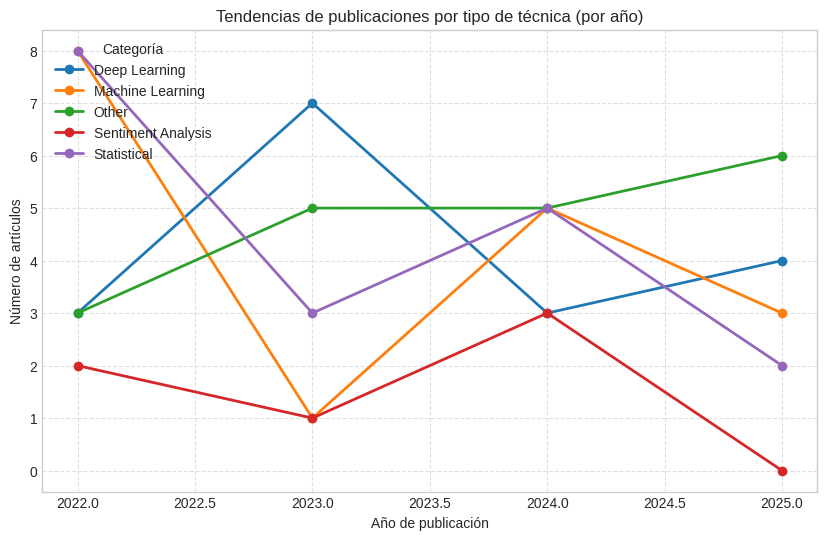

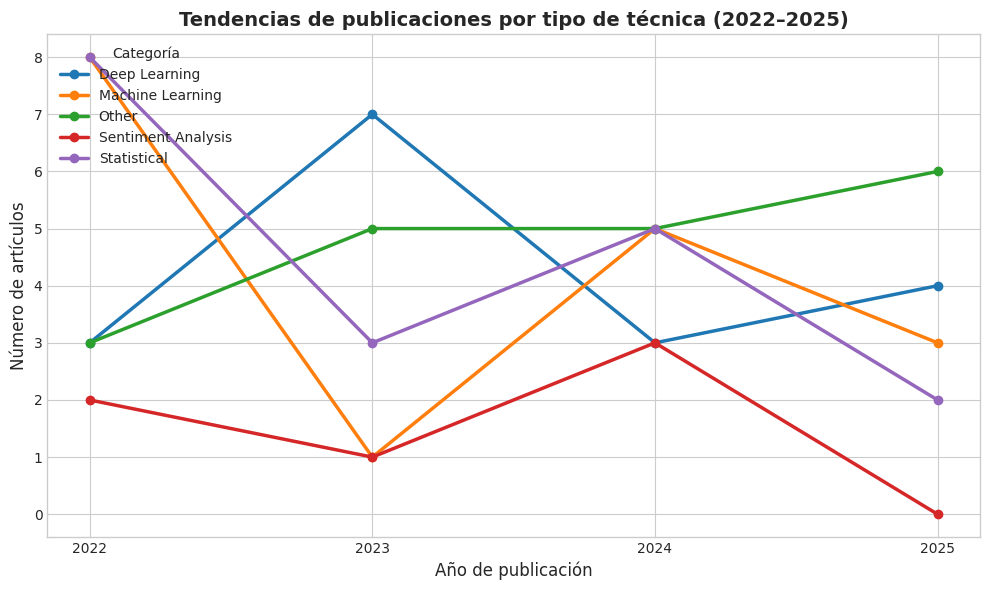

In [165]:
# ===========================================================
# 📈 Tendencias por año: Tipos de técnicas en publicaciones
# ===========================================================

import matplotlib.pyplot as plt
import pandas as pd

# Rellenar valores nulos
df_filtrado['Detected_Techniques'] = df_filtrado['Detected_Techniques'].fillna('')
df_filtrado['Sentiment_Keywords'] = df_filtrado['Sentiment_Keywords'].fillna('')

# =========================
# 🧠 Palabras clave por categoría
# =========================

# 1️⃣ Modelos estadísticos / econométricos
statistical_terms = [
    'arima', 'sarima', 'garch', 'egarch', 'arch', 'var', 'vecm',
    'regression', 'linear regression', 'logistic regression', 'bayesian regression',
    'kalman', 'markov', 'cointegration', 'time series forecasting'
]

# 2️⃣ Machine Learning
ml_terms = [
    'svm', 'support vector machine', 'random forest', 'decision tree', 'xgboost',
    'lightgbm', 'catboost', 'adaboost', 'knn', 'naive bayes', 'gradient boosting',
    'ensemble', 'mlp', 'multilayer perceptron', 'machine learning', 'ml',
    'feature selection', 'hyperparameter tuning'
]

# 3️⃣ Deep Learning
dl_terms = [
    'lstm', 'rnn', 'gru', 'cnn', 'dnn', 'autoencoder', 'deep learning', 'neural network',
    'ann', 'bilstm', 'bigru', 'attention', 'transformer', 'gan', 'vae', 'seq2seq',
    'encoder decoder'
]

# 4️⃣ NLP / Sentiment Analysis
sentiment_terms = [
    'sentiment', 'emotion', 'twitter', 'social media', 'reddit', 'facebook', 'nlp',
    'text mining', 'topic modeling', 'finbert', 'bert', 'roberta', 'gpt', 'xlm', 't5',
    'language model', 'word2vec', 'doc2vec', 'tf-idf', 'embedding', 'vader', 'textblob',
    'opinion mining'
]

# 5️⃣ Modelos híbridos / metaheurísticos
hybrid_terms = [
    'hybrid', 'fusion', 'multimodal', 'metaheuristic', 'genetic algorithm', 'pso',
    'particle swarm', 'optimization', 'firefly', 'simulated annealing',
    'reinforcement learning', 'q-learning', 'policy gradient'
]

# =========================
# ⚙️ Clasificación de artículos
# =========================
def classify_article(row):
    text = (row['Detected_Techniques'] + " " + row['Sentiment_Keywords']).lower()
    if any(term in text for term in statistical_terms):
        return 'Statistical'
    elif any(term in text for term in ml_terms):
        return 'Machine Learning'
    elif any(term in text for term in dl_terms):
        return 'Deep Learning'
    elif any(term in text for term in sentiment_terms):
        return 'Sentiment Analysis'
    elif any(term in text for term in hybrid_terms):
        return 'Hybrid / Metaheuristic'
    else:
        return 'Other'

# Aplicar clasificación
df_filtrado['Category'] = df_filtrado.apply(classify_article, axis=1)

# =========================
# 📅 Contar por año y categoría
# =========================
trend = df_filtrado.groupby(['publication_year', 'Category']).size().unstack(fill_value=0)

# ===========================================================
# 🔍 Detección automática de nuevas técnicas en artículos "Other"
# ===========================================================

import re
from collections import Counter

# 1️⃣ Filtrar artículos clasificados como 'Other'
df_other = df_filtrado[df_filtrado['Category'] == 'Other'].copy()

print(f"📄 Artículos clasificados como 'Other': {df_other.shape[0]}")

# 2️⃣ Unir texto de títulos + resúmenes
text = ' '.join(
    (df_other['title'].fillna('') + ' ' + df_other.get('abstract', '').fillna('')).str.lower()
)

# 3️⃣ Buscar posibles términos de técnicas
#    - Mayúsculas comunes (LSTM, CNN, GRU, etc.)
#    - Palabras que terminan en "model", "network", "regression", etc.
#    - Híbridos tipo "cnn-lstm", "elm", "deep belief network", etc.

pattern = r'\b(?:cnn|rnn|gru|lstm|elm|dbn|bilstm|bigru|autoencoder|transformer|deep belief network|' \
          r'bayesian network|ensemble|metaheuristic|hybrid|forecasting model|' \
          r'cnn-lstm|lstm-gru|cnn-gru|svr|xgboost|lightgbm|catboost|' \
          r'neural network|recurrent network|multilayer perceptron|' \
          r'time series model|statistical model|markov|gaussian|wavelet|' \
          r'optimization|pso|genetic algorithm|reinforcement learning|' \
          r'anomaly detection|attention|encoder decoder|tcn|sae)\b'

matches = re.findall(pattern, text, re.IGNORECASE)

# 4️⃣ Contar frecuencia de aparición
tech_counts = Counter(matches)

# 5️⃣ Mostrar las más comunes
print("\n🧩 Posibles nuevas técnicas detectadas en 'Other':")
for tech, count in tech_counts.most_common(25):
    print(f"{tech} — {count} menciones")

# 6️⃣ Exportar si quieres analizar más a fondo
pd.DataFrame(tech_counts.items(), columns=['Technique', 'Count']).sort_values(by='Count', ascending=False).to_csv(
    "potential_new_techniques_from_other.csv", index=False
)
print("\n✅ Archivo guardado: potential_new_techniques_from_other.csv")



print("📊 Publicaciones por año y categoría:")
display(trend.tail(10))  # Mostrar últimos años

# =========================
# 📈 Gráfica de tendencias
# =========================
plt.figure(figsize=(10,6))
for col in trend.columns:
    plt.plot(trend.index, trend[col], marker='o', linewidth=2, label=col)

plt.title("Tendencias de publicaciones por tipo de técnica (por año)")
plt.xlabel("Año de publicación")
plt.ylabel("Número de artículos")
plt.legend(title="Categoría", loc="upper left")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ===========================================
# 🎨 Versión mejorada de la gráfica de tendencias
# ===========================================
import seaborn as sns

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# Gráfico con marcadores más claros y paleta moderna
for col in trend.columns:
    plt.plot(trend.index, trend[col], marker='o', linewidth=2.5, label=col)

plt.title("Tendencias de publicaciones por tipo de técnica (2022–2025)", fontsize=14, fontweight='bold')
plt.xlabel("Año de publicación", fontsize=12)
plt.ylabel("Número de artículos", fontsize=12)
plt.legend(title="Categoría", loc="upper left", fontsize=10)
plt.xticks(sorted(trend.index))
plt.tight_layout()
plt.show()


In [152]:
# ===========================================================
# 📊 Tabla resumen: año, categoría y técnica más usada
# ===========================================================

# Contar ocurrencias de técnicas por año
tech_per_year = (
    df_tech[['publication_year', 'Detected_Techniques']]
    .dropna()
    .assign(Detected_Techniques=lambda x: x['Detected_Techniques'].str.split(', '))
    .explode('Detected_Techniques')
)

# Contar frecuencia por año y técnica
tech_freq = (
    tech_per_year
    .groupby(['publication_year', 'Detected_Techniques'])
    .size()
    .reset_index(name='count')
)

# Obtener la técnica más frecuente por año
top_tech_by_year = (
    tech_freq.loc[tech_freq.groupby('publication_year')['count'].idxmax()]
    .sort_values('publication_year')
)

print("🏆 Técnica más usada por año:\n")
print(top_tech_by_year)

# Combinar con la categoría general (para análisis más completo)
summary_table = (
    df_filtrado.groupby(['publication_year', 'Category'])
    .size()
    .reset_index(name='num_articles')
)

print("\n📘 Tabla resumen de artículos por año y categoría:\n")
print(summary_table)

# Guardar ambas tablas
top_tech_by_year.to_csv("top_techniques_by_year.csv", index=False)
summary_table.to_csv("articles_by_year_and_category.csv", index=False)

print("\n✅ Archivos guardados:")
print("- top_techniques_by_year.csv (técnica más frecuente por año)")
print("- articles_by_year_and_category.csv (conteo por categoría y año)")


🏆 Técnica más usada por año:

    publication_year Detected_Techniques  count
8               2022    Machine Learning      9
23              2023                LSTM      4
46              2024    Machine Learning      7
53              2025       Deep Learning      3

📘 Tabla resumen de artículos por año y categoría:

    publication_year            Category  num_articles
0               2022    Machine Learning             6
1               2022               Other             7
2               2022  Sentiment Analysis             3
3               2022         Statistical             8
4               2023       Deep Learning             4
5               2023    Machine Learning             1
6               2023               Other             8
7               2023  Sentiment Analysis             1
8               2023         Statistical             3
9               2024    Machine Learning             5
10              2024               Other             8
11              20

In [166]:
# ===========================================================
# 🧹 1️⃣ Revisar y excluir artículos "Other" antes de la selección
# ===========================================================

# Verificar cuántos artículos quedaron como "Other"
print("🔍 Artículos clasificados como 'Other':", df_filtrado[df_filtrado['Category'] == 'Other'].shape[0])

# Exportar posibles nuevos términos para revisión manual
potential_new_techniques = (
    df_filtrado[df_filtrado['Category'] == 'Other']
    [['publication_year', 'title', 'Detected_Techniques', 'Sentiment_Keywords']]
)
potential_new_techniques.to_csv("potential_new_techniques_from_other.csv", index=False)
print("📂 Archivo exportado: potential_new_techniques_from_other.csv")

# Filtrar los artículos válidos (sin 'Other')
df_valid = df_filtrado[df_filtrado['Category'] != 'Other'].copy()

# ===========================================================
# 📊 2️⃣ Calcular proporciones reales por categoría
# ===========================================================

category_counts = df_valid['Category'].value_counts()
proportions = (category_counts / category_counts.sum()) * 30  # Escalar a 30 artículos
proportions = proportions.round().astype(int)
print("\n📈 Proporciones de artículos por categoría (ajustadas a 30):")
print(proportions)

# ===========================================================
# 🧠 3️⃣ Seleccionar artículos proporcionalmente
# ===========================================================

df_selected = pd.DataFrame()
for category, n in proportions.items():
    subset = df_valid[df_valid['Category'] == category]
    subset = subset.sort_values(by='publication_year', ascending=False)
    df_selected = pd.concat([df_selected, subset.head(n)])

# Asegurar máximo 30 (por redondeos)
df_selected = df_selected.head(30)

# ===========================================================
# 💾 4️⃣ Exportar selección final
# ===========================================================
df_selected[['publication_year', 'title', 'Detected_Techniques', 'Category']].to_csv(
    "top_30_representative_articles.csv", index=False
)
print("\n✅ Archivo exportado: top_30_representative_articles.csv")
print(f"Total seleccionado: {df_selected.shape[0]} artículos")


🔍 Artículos clasificados como 'Other': 19
📂 Archivo exportado: potential_new_techniques_from_other.csv

📈 Proporciones de artículos por categoría (ajustadas a 30):
Category
Statistical           9
Machine Learning      9
Deep Learning         9
Sentiment Analysis    3
Name: count, dtype: int64

✅ Archivo exportado: top_30_representative_articles.csv
Total seleccionado: 30 artículos


🔍 Artículos clasificados como 'Other': 19
📂 Archivo exportado: potential_new_techniques_from_other.csv

📈 Proporciones de artículos por categoría (ajustadas a 30):


,count
Category,
Statistical,9
Machine Learning,9
Deep Learning,9
Sentiment Analysis,3



✅ Total seleccionado: 30 artículos


,publication_year,title,Detected_Techniques,Category
105,2025,"Predicting Bitcoin Prices by Applying LSTM, AR...","ARIMA, SARIMA, GARCH, LSTM",Statistical
106,2025,Comparison of Accuracy of Linear Regression an...,"Regression, Linear Regression, Random Forest",Statistical
102,2024,Predicting Bitcoin Price: Comparative Analysis...,"Regression, XGBoost, Machine Learning, LSTM, C...",Statistical
87,2024,Development of an ARIMA Model to Predict the M...,ARIMA,Statistical
32,2024,Analyzing the machine Learning methods to pred...,"Regression, Linear Regression, Logistic Regres...",Statistical
61,2024,Crypto currency-bitcoin Price Predictor using ...,"Regression, Linear Regression, Random Forest",Statistical
92,2024,Predicting bitcoin cryptocurrency price behavi...,ARIMA,Statistical
11,2023,Predicting Bitcoin Prices Using Machine Learning,"Regression, Logistic Regression, Support Vecto...",Statistical
69,2023,APPLICATION OF HYBRID LSTAR-GARCH MODEL WITH E...,GARCH,Statistical
98,2025,Machine Learning for Predicting Bitcoin and Et...,Machine Learning,Machine Learning


📁 Archivo exportado: top_30_representative_articles.csv


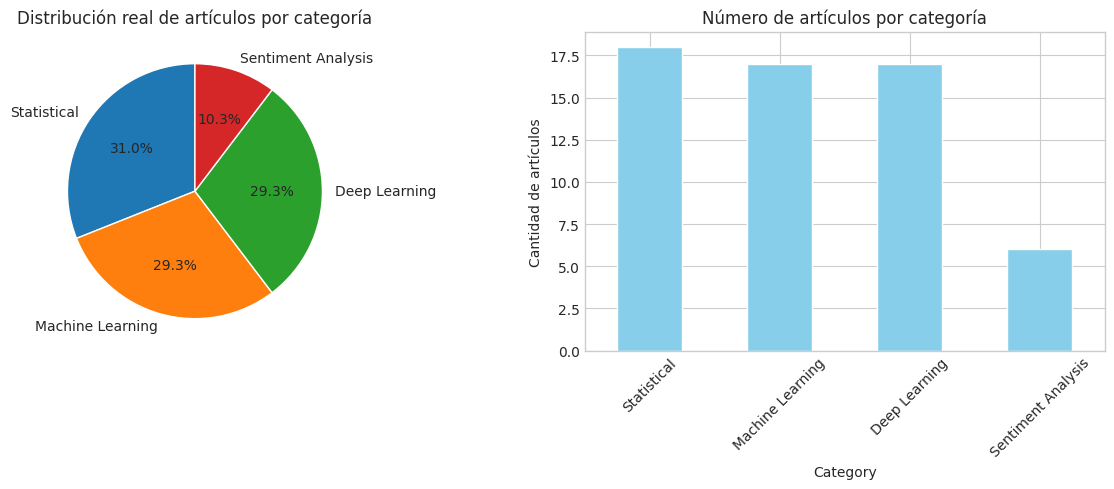

In [167]:
# ===========================================================
# 🧹 1️⃣ Revisar y excluir artículos "Other" antes de la selección
# ===========================================================
import pandas as pd
import matplotlib.pyplot as plt

# Verificar cuántos artículos quedaron como 'Other'
num_other = df_filtrado[df_filtrado['Category'] == 'Other'].shape[0]
print(f"🔍 Artículos clasificados como 'Other': {num_other}")

# Exportar los "Other" para revisión manual
potential_new_techniques = (
    df_filtrado[df_filtrado['Category'] == 'Other']
    [['publication_year', 'title', 'Detected_Techniques', 'Sentiment_Keywords']]
)
potential_new_techniques.to_csv("potential_new_techniques_from_other.csv", index=False)
print("📂 Archivo exportado: potential_new_techniques_from_other.csv")

# Filtrar los artículos válidos (sin 'Other')
df_valid = df_filtrado[df_filtrado['Category'] != 'Other'].copy()


# ===========================================================
# 📊 2️⃣ Calcular proporciones reales por categoría
# ===========================================================
category_counts = df_valid['Category'].value_counts().sort_values(ascending=False)
proportions = (category_counts / category_counts.sum()) * 30  # Escalar a 30 artículos
proportions = proportions.round().astype(int)

print("\n📈 Proporciones de artículos por categoría (ajustadas a 30):")
display(proportions)


# ===========================================================
# 🧠 3️⃣ Seleccionar artículos proporcionalmente
# ===========================================================
df_selected = pd.DataFrame()

for category, n in proportions.items():
    subset = df_valid[df_valid['Category'] == category]
    subset = subset.sort_values(by='publication_year', ascending=False)
    df_selected = pd.concat([df_selected, subset.head(n)])

# Asegurar máximo 30 artículos (por redondeos)
df_selected = df_selected.head(30)

print(f"\n✅ Total seleccionado: {df_selected.shape[0]} artículos")
display(df_selected[['publication_year', 'title', 'Detected_Techniques', 'Category']].head(10))


# ===========================================================
# 💾 4️⃣ Exportar selección final
# ===========================================================
df_selected[['publication_year', 'title', 'Detected_Techniques', 'Category']].to_csv(
    "top_30_representative_articles.csv", index=False
)
print("📁 Archivo exportado: top_30_representative_articles.csv")


# ===========================================================
# 📈 5️⃣ Visualizar proporción en gráfico de pastel y barras
# ===========================================================
plt.figure(figsize=(12,5))

# Gráfico de pastel
plt.subplot(1,2,1)
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribución real de artículos por categoría")

# Gráfico de barras
plt.subplot(1,2,2)
category_counts.plot(kind='bar', color='skyblue')
plt.title("Número de artículos por categoría")
plt.ylabel("Cantidad de artículos")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [169]:
# ===========================================================
# 🧩 SELECCIÓN FINAL DE 40 ARTÍCULOS (CON SENTIMENT FIJOS)
# ===========================================================
import pandas as pd

# Asegúrate de tener:
# - df_filtrado (con todas las categorías)
# - df_sentiment (con los 15 artículos ya confirmados)

# 1️⃣ Eliminar duplicados entre df_filtrado y df_sentiment
df_rest = df_filtrado[~df_filtrado['title'].isin(df_sentiment['title'])].copy()

# 2️⃣ Eliminar categoría 'Other' y filtrar años recientes
df_rest = df_rest[df_rest['Category'] != 'Other']
df_rest = df_rest[df_rest['publication_year'] >= 2022]

# 3️⃣ Definir las proporciones para completar los 40 artículos
selection_plan = {
    'Machine Learning': 10,
    'Deep Learning': 8,
    'Hybrid / Metaheuristic': 5,
    'Statistical': 2
}

df_selected_rest = pd.DataFrame()

for category, n in selection_plan.items():
    subset = df_rest[df_rest['Category'] == category].sort_values(by='publication_year', ascending=False)
    df_selected_rest = pd.concat([df_selected_rest, subset.head(n)])

# 4️⃣ Unir con los artículos de análisis de sentimiento
df_selected_final = pd.concat([df_sentiment, df_selected_rest])

# 5️⃣ Verificar total y ajustar si falta alguno
if df_selected_final.shape[0] < 40:
    faltan = 40 - df_selected_final.shape[0]
    print(f"⚠️ Faltan {faltan} artículos. Se completarán con los más recientes de otras categorías.")
    restantes = df_rest[~df_rest.index.isin(df_selected_rest.index)].sort_values(by='publication_year', ascending=False)
    df_selected_final = pd.concat([df_selected_final, restantes.head(faltan)])

# 6️⃣ Mostrar resumen final
print("\n✅ Total de artículos seleccionados:", df_selected_final.shape[0])
print(df_selected_final['Category'].value_counts())

# 7️⃣ Exportar CSV final
df_selected_final[['publication_year', 'title', 'Detected_Techniques', 'Category']].to_csv(
    "top_40_articles_for_analysis.csv", index=False
)
print("\n📁 Archivo exportado: top_40_articles_for_analysis.csv")


⚠️ Faltan 5 artículos. Se completarán con los más recientes de otras categorías.

✅ Total de artículos seleccionados: 40
Category
Machine Learning    10
Deep Learning        8
Statistical          7
Name: count, dtype: int64

📁 Archivo exportado: top_40_articles_for_analysis.csv


In [171]:
# ===========================================================
# 🧩 SELECCIÓN FINAL DE 40 ARTÍCULOS (df_sentiment + df_no_sentiment)
# ===========================================================
import pandas as pd

# 1️⃣ Verificar tamaños iniciales
print(f"Artículos con sentimiento: {df_sentiment.shape[0]}")
print(f"Artículos sin sentimiento: {df_no_sentiment.shape[0]}")

# 2️⃣ Limpiar categorías vacías
df_no_sentiment['Detected_Techniques'] = df_no_sentiment['Detected_Techniques'].fillna('')
df_no_sentiment['Sentiment_Keywords'] = df_no_sentiment['Sentiment_Keywords'].fillna('')
df_no_sentiment = df_no_sentiment[df_no_sentiment['publication_year'] >= 2022]

# 3️⃣ Clasificar (por si no tienen Category)
def classify_article(row):
    text = (row['Detected_Techniques'] + " " + row['Sentiment_Keywords']).lower()
    if any(term in text for term in ['arima', 'garch', 'var', 'regression']):
        return 'Statistical'
    elif any(term in text for term in ['svm', 'random forest', 'xgboost', 'machine learning']):
        return 'Machine Learning'
    elif any(term in text for term in ['lstm', 'gru', 'cnn', 'rnn', 'bert', 'transformer']):
        return 'Deep Learning'
    elif any(term in text for term in ['hybrid', 'fusion', 'metaheuristic', 'genetic algorithm', 'pso', 'reinforcement']):
        return 'Hybrid / Metaheuristic'
    else:
        return 'Other'

if 'Category' not in df_no_sentiment.columns:
    df_no_sentiment['Category'] = df_no_sentiment.apply(classify_article, axis=1)

# 4️⃣ Contar por categoría
print("\nDistribución en df_no_sentiment:")
print(df_no_sentiment['Category'].value_counts())

# 5️⃣ Seleccionar proporciones aproximadas
selection_plan = {
    'Machine Learning': 10,
    'Deep Learning': 8,
    'Hybrid / Metaheuristic': 5,
    'Statistical': 2
}

df_selected_rest = pd.DataFrame()

for category, n in selection_plan.items():
    subset = df_no_sentiment[df_no_sentiment['Category'] == category].sort_values(by='publication_year', ascending=False)
    df_selected_rest = pd.concat([df_selected_rest, subset.head(n)])

# 6️⃣ Unir con los de análisis de sentimiento
df_selected_final = pd.concat([df_sentiment, df_selected_rest]).drop_duplicates(subset=['title'])

# 7️⃣ Si faltan, rellenar hasta 40 con los más recientes del resto
if df_selected_final.shape[0] < 40:
    faltan = 40 - df_selected_final.shape[0]
    print(f"\n⚠️ Faltan {faltan} artículos. Se completarán con los más recientes.")
    restantes = df_no_sentiment[~df_no_sentiment.index.isin(df_selected_rest.index)].sort_values(by='publication_year', ascending=False)
    df_selected_final = pd.concat([df_selected_final, restantes.head(faltan)])

# 8️⃣ Ver resumen
print("\n✅ Total artículos seleccionados:", df_selected_final.shape[0])
print(df_selected_final['Category'].value_counts())

# 9️⃣ Exportar CSV final
df_selected_final[['publication_year', 'title', 'Detected_Techniques', 'Category']].to_csv(
    "top_40_articles_for_analysis.csv", index=False
)
print("\n📁 Archivo exportado: top_40_articles_for_analysis.csv")


Artículos con sentimiento: 15
Artículos sin sentimiento: 62

Distribución en df_no_sentiment:
Category
Other               30
Statistical         16
Machine Learning    12
Deep Learning        4
Name: count, dtype: int64

⚠️ Faltan 9 artículos. Se completarán con los más recientes.

✅ Total artículos seleccionados: 40
Category
Machine Learning    10
Other                9
Deep Learning        4
Statistical          2
Name: count, dtype: int64

📁 Archivo exportado: top_40_articles_for_analysis.csv


/tmp/ipython-input-1257760583.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_sentiment['Detected_Techniques'] = df_no_sentiment['Detected_Techniques'].fillna('')
/tmp/ipython-input-1257760583.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_sentiment['Sentiment_Keywords'] = df_no_sentiment['Sentiment_Keywords'].fillna('')
